![title](static/wcar.png)

# Visualising Overexpression Library Hits

In [1]:
#reload when modified
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from IPython.display import Image, display
import os

In [3]:
#!qstat -pri
#!qstat -F | grep 'all.'
#!qstat -fjc
#!qstat -ext
#!qstat -U mtinti -g c -q c6320
#!qstat -F
#!qstat -F | grep all.q

In [4]:
_GFF = os.path.join('genomes','tb927_3','tb927_3.gff')
_EXPERIMENT = 'CM03'
_ABS_PATH = os.path.join('')
_GTF = os.path.join('genomes','tb927_3','tb927_3.gtf')
_GENOME = os.path.join('genomes','tb927_3','tb927_3.fasta')
_FIG_OUT = '/cluster/majf_lab/mtinti/CM03/tmp/'

## Description Dict

In [10]:
#create a dictionary of gene to desc
#from the gff file
def make_desc():
    gff =pd.read_csv( _GFF, sep='\t', header=None, comment='#')
    gff = gff[gff.iloc[:,2]=='gene']
    desc = {}
    for n in gff.iloc[:,-1]:
        n=n.replace('%2C',' ')
        item_list = n.split(';')
        #print (item_list)
        temp_dict = {}
        for m in item_list:
            #print(m)
            temp_dict[m.split('=')[0].strip()]=m.split('=')[1].strip()
        #print(temp_dict['ID'])
        #print(temp_dict['description'])
        desc[temp_dict['ID']]=temp_dict.get('description','none')
    return desc

desc_dict = make_desc()

In [11]:
n='CM03_E_G1_S4'
temp = os.path.join(_ABS_PATH, n, 'counts.txt')
temp = pd.read_csv(temp,comment='#',sep='\t')
temp.head()

,Geneid,Chr,Start,End,Strand,Length,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup.bam,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup_F_plus_R.bam,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup_WO.bam,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted.bam
0,Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,360,301,59,494
1,Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,105,96,9,668
2,Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,205,183,22,894
3,Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,110,104,6,174
4,Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,530,377,153,694


In [12]:
temp.iloc[:,6:10].corr()

,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup.bam,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup_F_plus_R.bam,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup_WO.bam,/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted.bam
/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup.bam,1.000000,0.997975,0.980300,0.851613
/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup_F_plus_R.bam,0.997975,1.000000,0.965751,0.847277
/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted_dedup_WO.bam,0.980300,0.965751,1.000000,0.842945
/tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted.bam,0.851613,0.847277,0.842945,1.000000


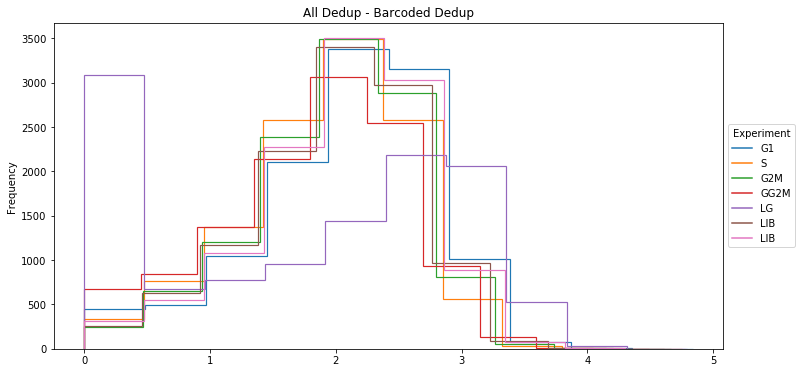

In [23]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
def hist_legend(ax, title = False):
    handles, labels = ax.get_legend_handles_labels()
    new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
    ax.legend(handles=new_handles, labels=labels, 
    title=title,loc='center left', bbox_to_anchor=(1, 0.5))  


exps=['CM03_E_G1_S4','CM03_F_S_S5','CM03_G_G2M_S6',
      'CM03_H_GG2M_S7','CM03_D_LG_S3','CM03_B_LIB_S1','CM03_C_LIB_S2']
fig,ax=plt.subplots(figsize=(12,6))
for n in exps:
    temp = os.path.join(_ABS_PATH, n, 'counts.txt')
    temp = pd.read_csv(temp,comment='#',sep='\t')
    temp['diff'] = temp.iloc[:,6]-temp.iloc[:,7] 
    np.log10(temp['diff']+1).plot(kind='hist',histtype='step',
                                  linewidth =1.2,ax=ax,label=n.split('_')[2])
hist_legend(ax,title='Experiment')
plt.title('All Dedup - Barcoded Dedup')
plt.show()

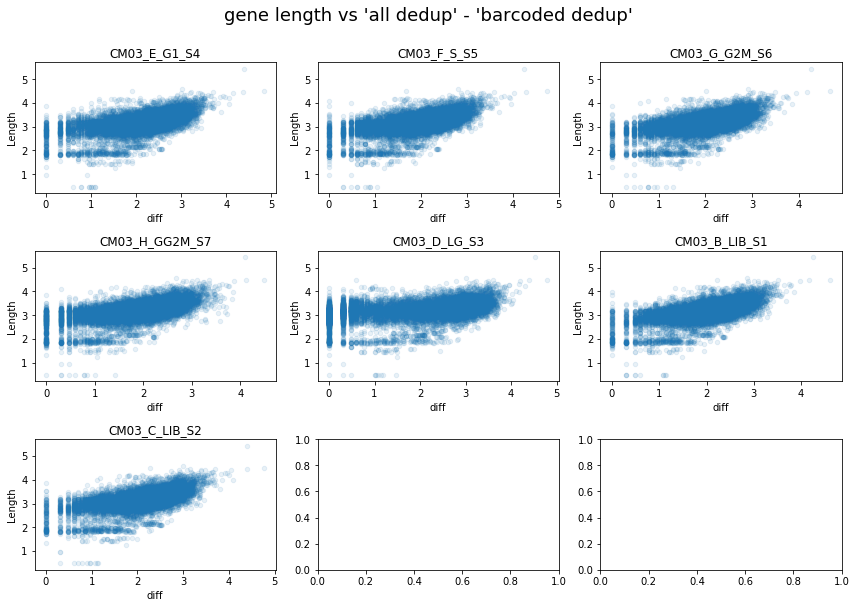

In [25]:
#longer genes have more reads without barcodes
#gene length vs 'all dedup' - 'barcoded dedup'
fig,axes=plt.subplots(ncols=3,nrows=3,figsize=(12,8))
for index,n in enumerate(exps):
    if index < 3:
        ax=axes[0,index]
    elif index < 6:
        ax=axes[1,index-3]
    else :
        ax=axes[2,index-6]
    temp = os.path.join(_ABS_PATH, n, 'counts.txt')
    temp = pd.read_csv(temp,comment='#',sep='\t')
    temp['diff'] = temp.iloc[:,6]-temp.iloc[:,7] 
    temp['diff'] = np.log10(temp['diff']+1)
    temp['Length'] = np.log10(temp['Length']) 
    temp.plot(y='Length', x='diff', kind='scatter', ax=ax, alpha=0.1)
    ax.set_title(n)
plt.suptitle("gene length vs 'all dedup' - 'barcoded dedup'",y=1.05,fontsize=18)
plt.tight_layout()

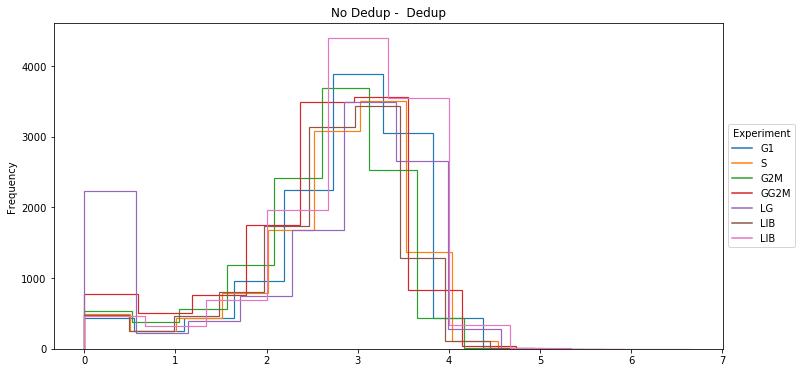

In [26]:
from matplotlib.lines import Line2D
def hist_legend(ax, title = False):
    handles, labels = ax.get_legend_handles_labels()
    new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
    ax.legend(handles=new_handles, labels=labels, 
    title=title,loc='center left', bbox_to_anchor=(1, 0.5))  



fig,ax=plt.subplots(figsize=(12,6))
for n in exps:
    temp = os.path.join(_ABS_PATH, n, 'counts.txt')
    temp = pd.read_csv(temp,comment='#',sep='\t')
    temp['diff'] = temp.iloc[:,-1]-temp.iloc[:,6] 
    np.log10(temp['diff']+1).plot(kind='hist',histtype='step',
                                  linewidth =1.2,ax=ax,label=n.split('_')[2])
hist_legend(ax,title='Experiment')

plt.title('No Dedup -  Dedup')
plt.show()

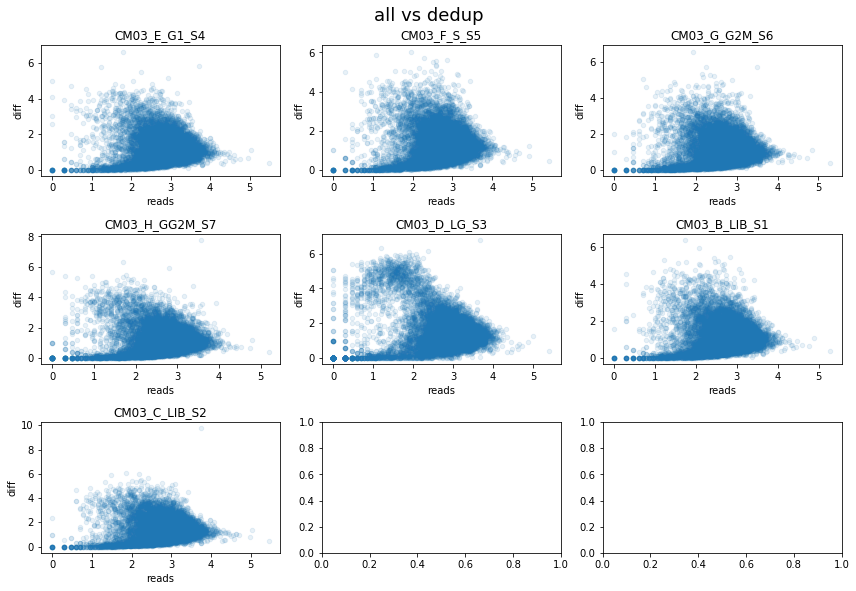

In [27]:
n='CM03_E_G1_S4'
fig,axes=plt.subplots(ncols=3,nrows=3,figsize=(12,8))
for index,n in enumerate(exps):
    if index < 3:
        ax=axes[0,index]
    elif index < 6:
        ax=axes[1,index-3]
    else :
        ax=axes[2,index-6]
    temp = os.path.join(_ABS_PATH, n, 'counts.txt')
    temp = pd.read_csv(temp,comment='#',sep='\t')
    temp['diff'] = np.log2(temp.iloc[:,-1]/temp.iloc[:,6])
    temp['reads'] = np.log10(temp.iloc[:,6]) 
    temp.plot(y='diff', x='reads', kind='scatter', ax=ax, alpha=0.1)
    ax.set_title(n)
plt.suptitle('all vs dedup',y=1.02,fontsize=18)
plt.tight_layout()

In [28]:
counts = [
            os.path.join(_ABS_PATH, 'CM03_E_G1_S4', 'counts.txt'),
            os.path.join(_ABS_PATH, 'CM03_F_S_S5', 'counts.txt'),
            os.path.join(_ABS_PATH, 'CM03_G_G2M_S6', 'counts.txt'),
            os.path.join(_ABS_PATH, 'CM03_H_GG2M_S7', 'counts.txt'),
            os.path.join(_ABS_PATH, 'CM03_D_LG_S3', 'counts.txt'),
            os.path.join(_ABS_PATH, 'CM03_B_LIB_S1', 'counts.txt'), 
            os.path.join(_ABS_PATH, 'CM03_C_LIB_S2', 'counts.txt'),     
    
    ]

template = pd.read_csv(counts[0],comment='#',sep='\t')
template = template.iloc[:,0:6]
template.head()

counts = [pd.read_csv(n,comment='#',sep='\t') for n in counts]


template['G1']=counts[0].iloc[:,6]
template['S'] = counts[1].iloc[:,6]
template['G2M'] = counts[2].iloc[:,6]
template['GG2M'] = counts[3].iloc[:,6]
template['LG'] = counts[4].iloc[:,6]
template['LIB1'] = counts[5].iloc[:,6]
template['LIB2'] = counts[6].iloc[:,6]

template['G1_barcode']=counts[0].iloc[:,7]
template['S_barcode'] = counts[1].iloc[:,7]
template['G2M_barcode'] = counts[2].iloc[:,7]
template['GG2M_barcode'] = counts[3].iloc[:,7]
template['LG_barcode'] = counts[4].iloc[:,7]
template['LIB1_barcode'] = counts[5].iloc[:,7]
template['LIB2_barcode'] = counts[6].iloc[:,7]

template.head()
df = template.copy()
df.head()

,Geneid,Chr,Start,End,Strand,Length,G1,S,G2M,GG2M,LG,LIB1,LIB2,G1_barcode,S_barcode,G2M_barcode,GG2M_barcode,LG_barcode,LIB1_barcode,LIB2_barcode
0,Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,360,263,297,301,2,211,432,301,235,217,279,0,173,359
1,Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,105,73,89,111,15,95,102,96,60,71,79,11,63,87
2,Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,205,143,91,14,1,136,172,183,126,82,12,0,119,153
3,Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,110,66,97,92,480,72,149,104,62,80,87,321,65,133
4,Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,530,445,416,400,1,460,745,377,338,286,353,0,346,496


In [29]:
template['LG_barcode'].describe()

count     11725.000000
mean        599.028571
std        2174.874923
min           0.000000
25%          31.000000
50%         307.000000
75%         764.000000
max      192508.000000
Name: LG_barcode, dtype: float64

/homes/mtinti/miniconda3/envs/ritSeq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


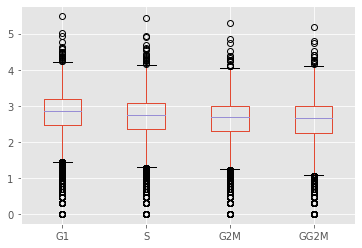

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
np.log10(df[['G1','S','G2M','GG2M']]).plot(kind='box')
plt.show()

/homes/mtinti/miniconda3/envs/ritSeq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


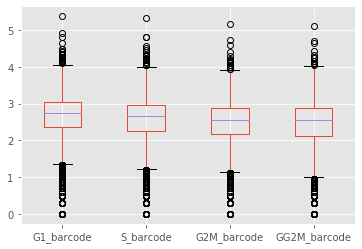

In [31]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
np.log10(df[['G1_barcode','S_barcode','G2M_barcode','GG2M_barcode']]).plot(kind='box')
plt.show()

In [32]:
#RPK reads per kilobase
def compute_RPK(X,col):
    temp = X[col]/(X['Length']/1000)
    return temp

extend='_barcode'
extend=''
df['G1_RPK']=  df.apply(compute_RPK,args=('G1'+extend,),axis=1)
df['S_RPK']=  df.apply(compute_RPK,args=('S'+extend,),axis=1)
df['G2M_RPK']=  df.apply(compute_RPK,args=('G2M'+extend,),axis=1)
df['GG2M_RPK']=  df.apply(compute_RPK,args=('GG2M'+extend,),axis=1)
df['LG_RPK']=  df.apply(compute_RPK,args=('LG'+extend,),axis=1)
df['LIB1_RPK']=  df.apply(compute_RPK,args=('LIB1'+extend,),axis=1)
df['LIB2_RPK']=  df.apply(compute_RPK,args=('LIB2'+extend,),axis=1)

In [33]:
df.head()

,Geneid,Chr,Start,End,Strand,Length,G1,S,G2M,GG2M,...,LG_barcode,LIB1_barcode,LIB2_barcode,G1_RPK,S_RPK,G2M_RPK,GG2M_RPK,LG_RPK,LIB1_RPK,LIB2_RPK
0,Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,360,263,297,301,...,0,173,359,641.711230,468.805704,529.411765,536.541889,3.565062,376.114082,770.053476
1,Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,105,73,89,111,...,11,63,87,154.867257,107.669617,131.268437,163.716814,22.123894,140.117994,150.442478
2,Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,205,143,91,14,...,0,119,153,142.065142,99.099099,63.063063,9.702010,0.693001,94.248094,119.196119
3,Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,110,66,97,92,...,321,65,133,75.445816,45.267490,66.529492,63.100137,329.218107,49.382716,102.194787
4,Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,530,445,416,400,...,0,346,496,411.810412,345.765346,323.232323,310.800311,0.777001,357.420357,578.865579


In [34]:
#TPM = Transcripts Per Kilobase Million
df['G1_TPM']=df['G1_RPK']/(df['G1_RPK'].sum()/1000000)
df['S_TPM']=df['S_RPK']/(df['S_RPK'].sum()/1000000)
df['G2M_TPM']=df['G2M_RPK']/(df['G2M_RPK'].sum()/1000000)
df['GG2M_TPM']=df['GG2M_RPK']/(df['GG2M_RPK'].sum()/1000000)
df['LG_TPM']=df['LG_RPK']/(df['LG_RPK'].sum()/1000000)
df['LIB1_TPM']=df['LIB1_RPK']/(df['LIB1_RPK'].sum()/1000000)
df['LIB2_TPM']=df['LIB2_RPK']/(df['LIB2_RPK'].sum()/1000000)

In [35]:
df.head()

,Geneid,Chr,Start,End,Strand,Length,G1,S,G2M,GG2M,...,LG_RPK,LIB1_RPK,LIB2_RPK,G1_TPM,S_TPM,G2M_TPM,GG2M_TPM,LG_TPM,LIB1_TPM,LIB2_TPM
0,Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,360,263,297,301,...,3.565062,376.114082,770.053476,87.197324,82.743170,107.667952,112.966181,0.530405,68.290788,109.776559
1,Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,105,73,89,111,...,22.123894,140.117994,150.442478,21.043749,19.003449,26.696429,34.469747,3.291560,25.441133,21.446637
2,Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,205,143,91,14,...,0.693001,94.248094,119.196119,19.304166,17.490772,12.825312,2.042709,0.103104,17.112565,16.992248
3,Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,110,66,97,92,...,329.218107,49.382716,102.194787,10.251766,7.989612,13.530289,13.285415,48.980577,8.966387,14.568588
4,Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,530,445,416,400,...,0.777001,357.420357,578.865579,55.957827,61.026819,65.736662,65.437434,0.115601,64.896581,82.521374


In [36]:
df['G1_TPM_norm']=df['G1_TPM']/df[['G1_TPM','S_TPM','G2M_TPM']].sum(axis=1)
df['S_TPM_norm']=df['S_TPM']/df[['G1_TPM','S_TPM','G2M_TPM']].sum(axis=1)
df['G2M_TPM_norm']=df['G2M_TPM']/df[['G1_TPM','S_TPM','G2M_TPM']].sum(axis=1)

In [37]:
df['desc']=[desc_dict.get(n,'none') for n in df.Geneid]

In [38]:
df['sumReads']=df[['G1'+extend,'S'+extend,'G2M'+extend]].sum(axis=1)

In [39]:
df['category']=df[['G1'+extend,'S'+extend,'G2M'+extend]].idxmax(axis=1)
df.head()

,Geneid,Chr,Start,End,Strand,Length,G1,S,G2M,GG2M,...,GG2M_TPM,LG_TPM,LIB1_TPM,LIB2_TPM,G1_TPM_norm,S_TPM_norm,G2M_TPM_norm,desc,sumReads,category
0,Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,360,263,297,301,...,112.966181,0.530405,68.290788,109.776559,0.314102,0.298057,0.387841,variant surface glycoprotein (VSG pseudogene)...,920,G1
1,Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,105,73,89,111,...,34.469747,3.291560,25.441133,21.446637,0.315292,0.284723,0.399985,expression site-associated gene 3 (ESAG3 pseu...,267,G1
2,Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,205,143,91,14,...,2.042709,0.103104,17.112565,16.992248,0.389038,0.352493,0.258469,variant surface glycoprotein (VSG pseudogene)...,439,G1
3,Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,110,66,97,92,...,13.285415,48.980577,8.966387,14.568588,0.322670,0.251470,0.425860,variant surface glycoprotein (VSG pseudogene)...,273,G1
4,Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,530,445,416,400,...,65.437434,0.115601,64.896581,82.521374,0.306247,0.333989,0.359765,variant surface glycoprotein (VSG pseudogene)...,1391,G1


In [40]:
#df.head()

In [41]:
df[df['G1'+extend]>500].sort_values('G1_TPM_norm').tail(10)

,Geneid,Chr,Start,End,Strand,Length,G1,S,G2M,GG2M,...,GG2M_TPM,LG_TPM,LIB1_TPM,LIB2_TPM,G1_TPM_norm,S_TPM_norm,G2M_TPM_norm,desc,sumReads,category
8458,Tb11.v5.0631,Tb927_11_bin_v5.1,3062681,3064579,+,1899,506,156,183,202,...,22.396039,48.574340,22.086635,17.566273,0.515002,0.206233,0.278765,pre-mRNA processing factor 4 (PRP4) like/WD do...,845,G1
5921,Tb927.10.15850,Tb927_10_v5.1,3912241,3913689,+,1449,544,170,190,425,...,61.754038,53.083842,33.832798,41.714419,0.518499,0.210462,0.271039,Peroxisome biogenesis factor 12,904,G1
367,Tb927.8.2861,Tb927_08_v5.1,860996,861256,-,261,507,171,163,247,...,199.251344,1.140065,178.091007,202.638578,0.521031,0.228259,0.250710,SRP RNA 7SL,841,G1
5347,Tb927.10.10740,Tb927_10_v5.1,2611259,2612979,-,1721,936,303,303,101,...,12.356211,8.385540,55.494176,32.553704,0.524940,0.220725,0.254335,hypothetical protein conserved,1542,G1
4332,Tb927.10.960,Tb927_10_v5.1,260249,262273,+,2025,541,142,200,295,...,30.671979,47.241767,24.567902,22.105144,0.527918,0.179984,0.292098,U4/U6-specific protein PRP4,883,G1
8961,Tb927.1.720,Tb927_01_v5.1,235712,237504,-,1793,874,249,295,178,...,20.901840,183.711995,55.493587,50.725825,0.533269,0.197338,0.269393,phosphoglycerate kinase,1418,G1
3567,Tb927.9.10170,Tb927_09_v5.1,1604247,1604908,-,662,574,203,159,17,...,5.406743,2.022668,33.461420,72.355244,0.533631,0.245133,0.221236,anaphase-promoting complex subunit 11,936,G1
5219,Tb927.10.9430,Tb927_10_v5.1,2329126,2330380,+,1255,927,322,244,115,...,19.292963,64.727540,61.776981,59.408240,0.541967,0.244526,0.213507,phosphoribosylpyrophosphate synthetase putative,1493,G1
7424,Tb927.11.13830,Tb927_11_v5.1,3680329,3681367,+,1039,628,208,171,211,...,42.757443,150.353637,43.688486,96.867453,0.544145,0.234096,0.221759,DnaJ domain containing protein putative,1007,G1
9672,Tb927.6.2060,Tb927_06_v5.1,670484,672171,-,1688,1580,535,361,653,...,81.448962,52.001965,122.193589,68.069306,0.561236,0.246842,0.191922,histidyl-tRNA synthetase,2476,G1


In [42]:
def radviz(frame, class_column, ax=None, **kwds):
    """RadViz - a multivariate data visualization algorithm
    Parameters:
    -----------
    frame: DataFrame object
    class_column: Column name that contains information about class membership
    ax: Matplotlib axis object, optional
    kwds: Matplotlib scatter method keyword arguments, optional
    Returns:
    --------
    ax: Matplotlib axis object
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import matplotlib.text as text
    import random
    def random_color(column):
        random.seed(column)
        return [random.random() for _ in range(3)]
    def normalize(series):
        a = min(series)
        b = max(series)
        return (series - a) / (b - a)
    column_names = [column_name for column_name in frame.columns if column_name != class_column]
    columns = [normalize(frame[column_name]) for column_name in column_names]
    if ax == None:
        ax = plt.gca(xlim=[-1, 1], ylim=[-1, 1])
    classes = set(frame[class_column])
    to_plot = {}
    for class_ in classes:
        to_plot[class_] = [[], [],[]]
    n = len(frame.columns) - 1
    s = np.array([(np.cos(t), np.sin(t)) for t in [2.0 * np.pi * (i / float(n)) for i in range(n)]])
    for i in range(len(frame)):
        #print(i)
        row = np.array([column[i] for column in columns])
        row_ = np.repeat(np.expand_dims(row, axis=1), 2, axis=1)
        y = (s * row_).sum(axis=0) / row.sum()
        class_name = frame[class_column][i]
        to_plot[class_name][0].append(y[0])
        to_plot[class_name][1].append(y[1])
        to_plot[class_name][2].append(frame.index.values[i])
    for class_ in classes:
        ax.scatter(to_plot[class_][0], to_plot[class_][1], color=random_color(class_), label=str(class_),
                   s=10,alpha=0.3, **kwds)
    ax.add_patch(patches.Circle((0.0, 0.0), radius=1.0, facecolor='none'))
    print(column_names)
    for xy, name in zip(s, column_names):
        ax.add_patch(patches.Circle(xy, radius=0.015, facecolor='gray',alpha=0))
        if xy[0] < 0.0 and xy[1] < 0.0:
            ax.text(xy[0] - 0.025, xy[1] - 0.025, name, ha='right', va='top', size='small')
        elif xy[0] < 0.0 and xy[1] >= 0.0:
            ax.text(xy[0] - 0.025, xy[1] + 0.025, name, ha='right', va='bottom', size='small')
        elif xy[0] >= 0.0 and xy[1] < 0.0:
            ax.text(xy[0] + 0.025, xy[1] - 0.025, name, ha='left', va='top', size='small')
        elif xy[0] >= 0.0 and xy[1] >= 0.0:
            ax.text(xy[0] + 0.025, xy[1] + 0.025, name, ha='left', va='bottom', size='small')
    ax.legend(loc='upper right')
    ax.axis('equal')
    return ax,to_plot,s

['G1_TPM_norm', 'S_TPM_norm', 'G2M_TPM_norm']


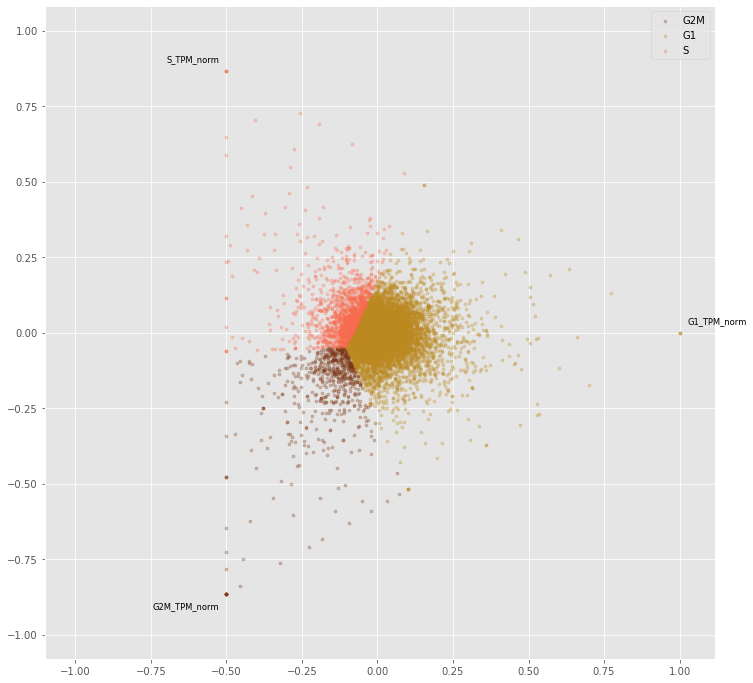

In [43]:
fig,ax=plt.subplots(figsize=(12,12))
#temp = df[df['sumReads']>1000]
#print(temp['category'].value_counts())
rad_viz,to_plot,s = radviz(df[['G1_TPM_norm','S_TPM_norm','G2M_TPM_norm','category']],
                             'category',ax=ax,)

In [44]:
ids = to_plot['S'][2]+to_plot['G1'][2]+to_plot['G2M'][2]
x=to_plot['S'][0]+to_plot['G1'][0]+to_plot['G2M'][0]
y=to_plot['S'][1]+to_plot['G1'][1]+to_plot['G2M'][1]
temp=pd.DataFrame(index=ids)
temp['rv_x']=x
temp['rv_y']=y
merge=df.join(temp)
merge.head()

,Geneid,Chr,Start,End,Strand,Length,G1,S,G2M,GG2M,...,LIB1_TPM,LIB2_TPM,G1_TPM_norm,S_TPM_norm,G2M_TPM_norm,desc,sumReads,category,rv_x,rv_y
0,Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,360,263,297,301,...,68.290788,109.776559,0.314102,0.298057,0.387841,variant surface glycoprotein (VSG pseudogene)...,920,G1,-0.028847,-0.077755
1,Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,105,73,89,111,...,25.441133,21.446637,0.315292,0.284723,0.399985,expression site-associated gene 3 (ESAG3 pseu...,267,G1,-0.027062,-0.099820
2,Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,205,143,91,14,...,17.112565,16.992248,0.389038,0.352493,0.258469,variant surface glycoprotein (VSG pseudogene)...,439,G1,0.083557,0.081427
3,Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,110,66,97,92,...,8.966387,14.568588,0.322670,0.251470,0.425860,variant surface glycoprotein (VSG pseudogene)...,273,G1,-0.015995,-0.151027
4,Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,530,445,416,400,...,64.896581,82.521374,0.306247,0.333989,0.359765,variant surface glycoprotein (VSG pseudogene)...,1391,G1,-0.040630,-0.022323


In [45]:
merge[merge.Geneid.isin(['Tb927.7.5050'])][['G1', 'S', 'G2M', 'GG2M', 'LG']]

,G1,S,G2M,GG2M,LG
1481,67,4,32,1136,2


In [47]:
merge.to_csv('merge_BSF2.csv')

In [30]:
markers = pd.DataFrame(s)
markers['columns']=['G1','S','G2M']
markers.to_csv('markers.csv')

In [31]:
import seaborn as sns

(-1.1, 1.1)

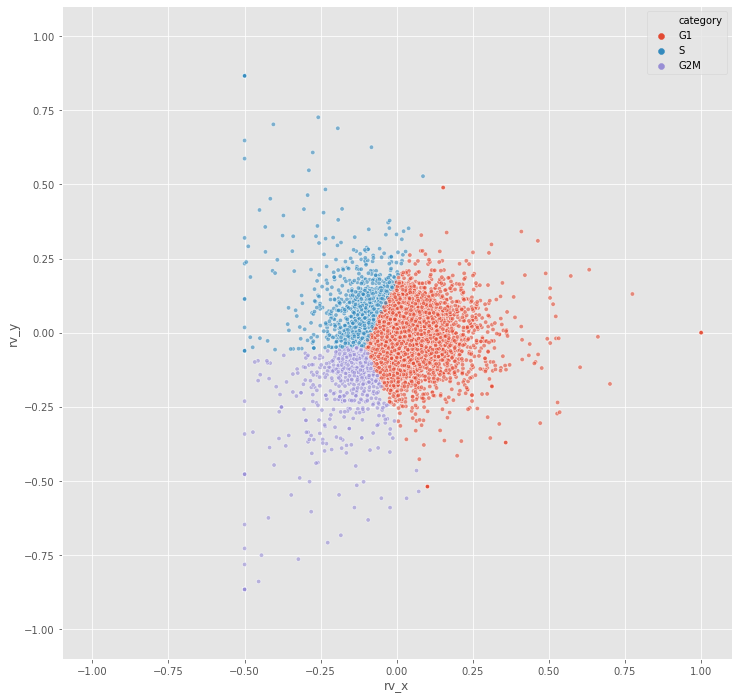

In [32]:
fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(data=merge,x='rv_x',y='rv_y',hue='category',ax=ax,s=20,alpha=0.6)
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
#sns.scatterplot(data=merge[merge.desc.str.contains('passenger')],x='rv_x',y='rv_y',ax=ax,s=20)

In [33]:
#merge[merge.desc.str.contains('passenger')]

(-1.1, 1.1)

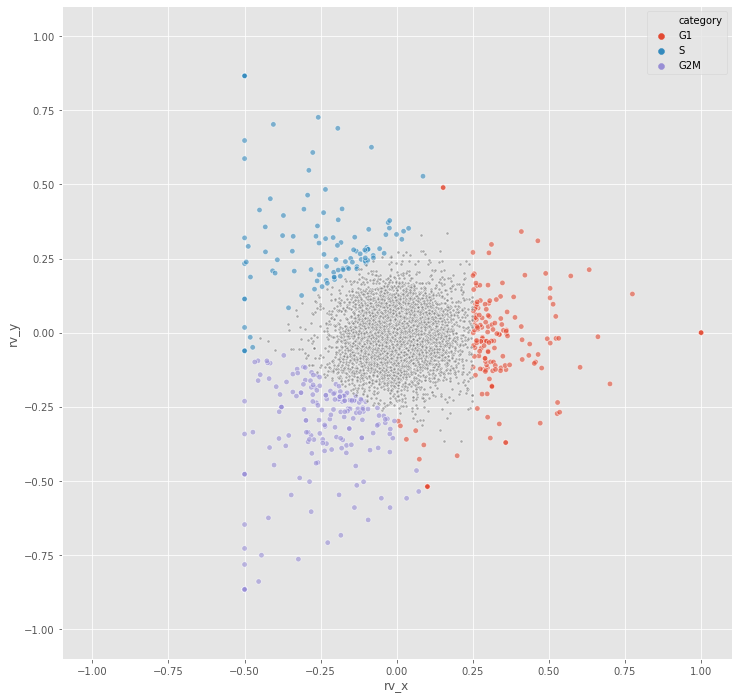

In [34]:
fig,ax=plt.subplots(figsize=(12,12))
temp = merge.copy()
temp1=temp[temp[['G1_TPM_norm','S_TPM_norm','G2M_TPM_norm']].max(axis=1)>0.5]
sns.scatterplot(data=temp1,x='rv_x',y='rv_y',hue='category',ax=ax,s=30,alpha=0.6)
temp2=temp[temp[['G1_TPM_norm','S_TPM_norm','G2M_TPM_norm']].max(axis=1)<0.5]
sns.scatterplot(data=temp2,x='rv_x',y='rv_y',ax=ax,s=10,alpha=0.6,color='gray')

ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)


In [ ]:
CM03/CM03_B_LIB_S1/co

In [16]:
import pandas as pd
path = '{exp}/counts.txt.summary'
for n in ['CM03_B_LIB_S1','CM03_D_LG_S3','CM03_E_G1_S4',
          'CM03_F_S_S5','CM03_G_G2M_S6','CM03_H_GG2M_S7']:
    tpath = path.format(exp=n)
    tdf = pd.read_csv(tpath,sep='\t',index_col=[0])
    print(n,tdf.loc['Assigned'][-1],tdf.columns[-1])
    
    

CM03_B_LIB_S1 26255108 /tmp/13003738.1.all.q/CM03_B_LIB_S1/S1_sorted.bam
CM03_D_LG_S3 37086847 /tmp/13003737.1.all.q/CM03_D_LG_S3/S3_sorted.bam
CM03_E_G1_S4 35138769 /tmp/13003742.1.all.q/CM03_E_G1_S4/S4_sorted.bam
CM03_F_S_S5 30331764 /tmp/13003741.1.all.q/CM03_F_S_S5/S5_sorted.bam
CM03_G_G2M_S6 22583372 /tmp/13003740.1.all.q/CM03_G_G2M_S6/S6_sorted.bam
CM03_H_GG2M_S7 24918206 /tmp/13003739.1.all.q/CM03_H_GG2M_S7/S7_sorted.bam


total 64912
drwxr-xr-x 3 mtinti lsd      512 May 19 18:05 alt_dataset
-rw-r--r-- 1 mtinti lsd  2432494 May 19 18:05 alt_dataset.tar.gz
-rw-r--r-- 1 mtinti lsd  1024639 Jun  1 13:46 assemble_table.ipynb
drwxr-xr-x 6 mtinti lsd    16384 Apr 29 15:17 CM03_B_LIB_S1
drwxr-xr-x 6 mtinti lsd    16384 Apr 29 15:17 CM03_D_LG_S3
drwxr-xr-x 6 mtinti lsd    16384 Apr 29 15:17 CM03_E_G1_S4
drwxr-xr-x 2 mtinti lsd    32768 May 29 10:10 CM03_figures
drwxr-xr-x 6 mtinti lsd    16384 Apr 29 15:16 CM03_F_S_S5
drwxr-xr-x 6 mtinti lsd    16384 Apr 29 15:14 CM03_G_G2M_S6
drwxr-xr-x 6 mtinti lsd    16384 Apr 29 15:17 CM03_H_GG2M_S7
-rw-r--r-- 1 mtinti lsd   826364 Mar  6 19:38 coverage_template2.ipynb
-rw-r--r-- 1 mtinti lsd   567499 Mar  6 21:22 coverage_template3.ipynb
-rw-r--r-- 1 mtinti lsd    85011 Mar 11 14:41 coverage_template.ipynb
lrwxrwxrwx 1 mtinti lsd       40 Mar  6 08:00 genomes -> /homes/mtinti/RNAseq/viper-test/genomes/
-rw-r--r-- 1 mtinti lsd     2172 Apr 17 20:52 goa.txt
-rw-r--r-- 1 mtint

In [2]:
import pandas as pd
intable = pd.read_csv('merge_BSF.csv')
list(intable.columns)

['Unnamed: 0',
 'Geneid',
 'Chr',
 'Start',
 'End',
 'Strand',
 'Length',
 'G1',
 'S',
 'G2M',
 'GG2M',
 'LG',
 'LIB',
 'G1_barcode',
 'S_barcode',
 'G2M_barcode',
 'GG2M_barcode',
 'LG_barcode',
 'LIB_barcode',
 'G1_RPK',
 'S_RPK',
 'G2M_RPK',
 'GG2M_RPK',
 'LG_RPK',
 'LIB_RPK',
 'G1_TPM',
 'S_TPM',
 'G2M_TPM',
 'GG2M_TPM',
 'LG_TPM',
 'LIB_TPM',
 'G1_TPM_norm',
 'S_TPM_norm',
 'G2M_TPM_norm',
 'desc',
 'sumReads',
 'category',
 'rv_x',
 'rv_y']